In [83]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import astropy.units as units
import galpy
from astropy.constants import G
from galpy.util import bovy_conversion
from galpy import potential
from galpy.util import bovy_plot
bovy_plot.bovy_print(axes_labelsize=17.,text_fontsize=12.,
                     xtick_labelsize=15.,ytick_labelsize=15.)

print (G)
print (G.to('kpc^3/Msun*s^2'))

  Name   = Gravitational constant
  Value  = 6.67408e-11
  Uncertainty  = 3.1e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2014
4.517103050001135e-39 kpc3 / (s2 solMass)


# Problem 1
# a)

A location at radius R in the galaxy will have a velocity of,

\begin{align}
\mathbf{v}=-v_c(R)(\mathbf{\hat{R}}\times \mathbf{\hat{n}})+v_R(R)\mathbf{\hat{R}}
\end{align}

where is $v_R$ is the additional radial velocity component.

Now, following the notes gives,

\begin{align}
V&=\mathbf{\hat{r}}\cdot \mathbf{v} \\
&=v_c(R)\mathbf{\hat{R}}\cdot (\mathbf{\hat{r}}\times\mathbf{\hat{n}}) + v_R(R)(\mathbf{\hat{r}}\cdot \mathbf{\hat{R}}) \\
&=v_c(R)\mathbf{\hat{R}}\cdot\mathbf{\hat{k}}sini+v_R(R)(\mathbf{\hat{R}}\cdot \mathbf{\hat{r}})
\end{align}

Now unlike $\mathbf{\hat{k}}$, $\mathbf{\hat{r}}$ is not in the galactic plane and so we must project $\mathbf{\hat{r}}$ onto the galactic plane before we project it onto $\mathbf{\hat{R}}$. Thus,

\begin{align}
\mathbf{\hat{R}}\cdot\mathbf{\hat{r}}&=|\mathbf{\hat{R}}||\mathbf{\hat{r}}|cos\chi \\
&=sin\theta cos(90-i)=sin\theta sini
\end{align}

So, 

\begin{align}
V=v_c(R)cos\theta sini+v_R(R)sin\theta sini
\end{align}

# b)

substituting $v_R(R)=fv_c(R)$ into the above expression for V(x,y) gives,

$$V=\Omega Rcos\theta sini+f\Omega Rsin\theta sini$$

now subtituting $x=x'=Rcos\theta$ and $y'=Rsin\theta=y/cosi$ gives,

$$V=\Omega xsini+f\Omega y\frac{sini}{cosi}$$

$$V=\Omega\big(xsini+fytani\big)$$

plots below show how the contours change as a function of f (i.e. f=(0,0.1,0.5)) where the inclination angle has been set to i=50$^{\circ}$. Clearly, adding a radial velocity component to a solid-body rotation acts to rotate the level contours (i.e. straight vertical lines are no longer constant velocity).   

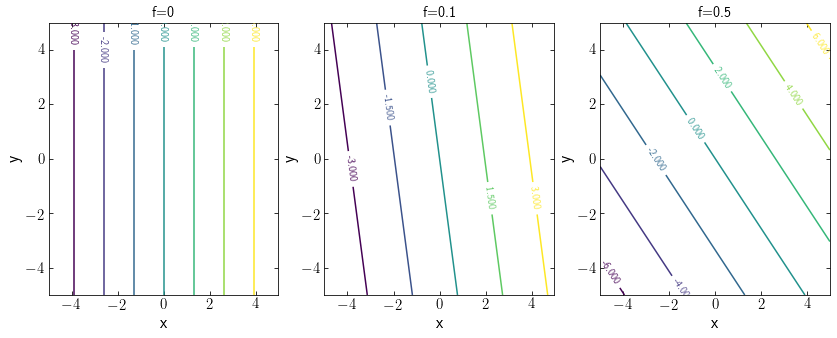

In [84]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
delta = 0.025
i=50*(2*numpy.pi)/360
x = numpy.arange(-5.0, 5.0, delta)
y = numpy.arange(-5.0, 5.0, delta)
X, Y = numpy.meshgrid(x, y)
Z=X*numpy.sin(i)+0.*Y*numpy.tan(i)
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('f=0')
plt.subplot(1,3,2)
Z=X*numpy.sin(i)+0.1*Y*numpy.tan(i)
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('f=0.1')
plt.subplot(1,3,3)
Z=X*numpy.sin(i)+0.5*Y*numpy.tan(i)
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('f=0.5')

# c)

Now, since changing f only acts to rotate the contours we can calculate the relation for the degree of rotation (call it $\phi$) as a function of f and i values,

\begin{align}
\phi&=arctan\bigg(\frac{V(0,1)}{V(1,0)}\bigg) \\
&=arctan\bigg(\frac{ftani}{sini}\bigg) \\
&=arctan\bigg(\frac{f}{cosi}\bigg)
\end{align}

where $\phi$ is the amount of rotation of the vertical contours seen for f=0. We calculate the values for the three test cases plotted above.

In [85]:
import math
print('The values of $\phi$ for f=0,0.1,0.5 are:')
print (math.degrees(numpy.arctan(0/numpy.cos(i))))
print (math.degrees(numpy.arctan(0.1/numpy.cos(i))))
print (math.degrees(numpy.arctan(0.5/numpy.cos(i))))

The values of $\phi$ for f=0,0.1,0.5 are:
0.0
8.842755903111364
37.877987144333105


It follows then that f can be extracted by plottting the velocity field and determning the axis of symmetry of the contours. The measured angle of this axis the vertical axis can then be fed into the above equation for $\phi$ to isloate for f. The equation for $\phi$ shows degeneracy between f and i so i must be known a priori to isolate for f. This method would be a simplification of the tilted-ring model (see equation 7.11 of notes) which assumed a radial velocity component but performed fits on a set of annuli to allow for variations in i and the semi-major axis with R.

In otherwords, the tilt of the velocity field contours gives us a measure of an f value. Since, the cores of many galaxies display rigid body rotation (e.g. NGC 3198) we can apply this method to get a measure of f and thus $v_R$ for galaxies' inner regions.

# d)


In [86]:
from galpy.potential import vcirc
from galpy.util import bovy_plot
import astropy.units as u
def plot_twod_vfield(pot,sini=0.5,
                     xmin=-2.,xmax=2.,nxs=100,
                     ymin=-2.,ymax=2.,nys=100,**kwargs):
    Vfield= numpy.empty((nxs,nys))
    xs= numpy.linspace(xmin,xmax,nxs)
    ys= numpy.linspace(ymin,ymax,nys)
    cos2i= 1.-sini**2.
    cosi=numpy.sqrt(cos2i)
    for ii in range(nxs):
        for jj in range(nys):
            R= numpy.sqrt(xs[ii]**2.+ys[jj]**2./cos2i)
            Vfield[ii,jj]= vcirc(pot,R)*xs[ii]/R*sini+f*vcirc(pot,R)*(ys[jj]/(R*cosi)*sini)
    dx= xs[1]-xs[0]
    dy= ys[1]-ys[0]
    return bovy_plot.bovy_dens2d(Vfield.T,origin='lower',
                                 xrange=[xmin-dx/2.,xmax+dx/2.],
                                 yrange=[ymin-dy/2.,ymax+dy/2.],
                                 xlabel=r'$x$',ylabel=r'$y$',
                                **kwargs)

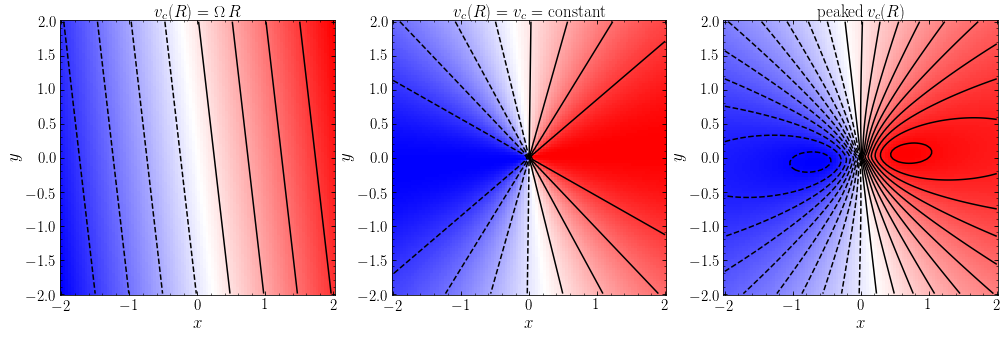

In [87]:
f=0.1
from galpy import potential
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
# approximates solid-body rotation near center
hp= potential.IsochronePotential(normalize=1.,b=1000.)
plot_twod_vfield(hp,contours=True,cmap='bwr',gcf=True)
bovy_plot.bovy_text(r'$v_c(R) = \Omega\,R$',title=True,size=17.)
plt.subplot(1,3,2)
lp= potential.LogarithmicHaloPotential(normalize=1.)
plot_twod_vfield(lp,contours=True,cmap='bwr',gcf=True)
bovy_plot.bovy_text(r'$v_c(R) = v_c = \mathrm{constant}$',
                    title=True,size=17.)
plt.subplot(1,3,3)
plot_twod_vfield(potential.MWPotential2014,contours=True,cmap='bwr',
                 levels=numpy.linspace(-.5,.5,21),gcf=True)
bovy_plot.bovy_text(r'$\mathrm{peaked}\, v_c(R)$',title=True,size=17.)
plt.tight_layout()

The contour plots above show that including an additional radial velocity term acts to rotate the axis of symmetry of the velocity field as noted for rigid body rotation in part (c). 

The contours seem to indicate that the rotation is independent of the rotation regime considered (e.g. rigid-body, flat rotation curve, peaked rotation curve). 

To investigate this further we can choose a larger value of f (f=0.9) and see how it affects the velocity field for each regime.

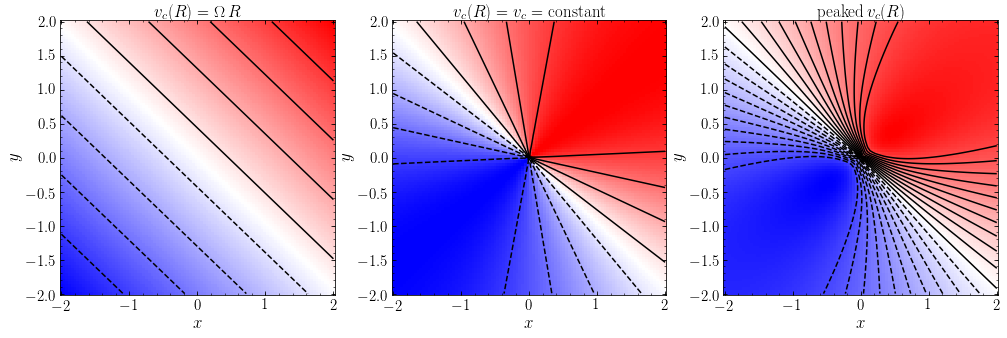

In [88]:
f=0.9
from galpy import potential
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
# approximates solid-body rotation near center
hp= potential.IsochronePotential(normalize=1.,b=1000.)
plot_twod_vfield(hp,contours=True,cmap='bwr',gcf=True)
bovy_plot.bovy_text(r'$v_c(R) = \Omega\,R$',title=True,size=17.)
plt.subplot(1,3,2)
lp= potential.LogarithmicHaloPotential(normalize=1.)
plot_twod_vfield(lp,contours=True,cmap='bwr',gcf=True)
bovy_plot.bovy_text(r'$v_c(R) = v_c = \mathrm{constant}$',
                    title=True,size=17.)
plt.subplot(1,3,3)
plot_twod_vfield(potential.MWPotential2014,contours=True,cmap='bwr',
                 levels=numpy.linspace(-.5,.5,21),gcf=True)
bovy_plot.bovy_text(r'$\mathrm{peaked}\, v_c(R)$',title=True,size=17.)
plt.tight_layout()

From the above plots we see that rigid-body and flat rotation regimes behave similarly to changes in f (i.e. linear transformation=simple rotation) while the peaked rotation regime while displaying a simple rotation seems to also show a complex dependence on f resulting in the loss of closed loops.

# e)

We can get a rough estimate of the f value for NGC 3198 by simply looking at the degree of rotation of the axis of symmetry (i.e. angle between the expected semimajor axis and axis of symmetry). We assume here that the expected semimajor axis before rotation would be along the  vertical axis in figure of the notes.  

Thus, $\phi\approx arctan(1'/15')=4^{\circ}$ 

Recall, that in part (c) we showed a degeneracy between f and i in determining the rotation ($\phi$) of the contour velcocity field map. Assuming that we have no previous knowledge of i for NGC 3198 we can get a ROUGH estimate of i by taking the ratio of the semi major/minor axes and assuming circular symmetry of the disk. 

Looking at HI emission image in the notes we see that the semimajor axis spans roughty 20' while the semiminor spans roughly 5'. Thus, assuming that the disk is circular allows us to get a measure of i since $20'cosi=5' \implies i\sim 75^{\circ}$

Thus, plugging i=75 and $\phi$=4 into expression in part (c) gives us $f\approx 0.02$.


$\textbf{REVISED!!!}$:

The correct way to determine the angle $\phi$ is actually to measure the angle between the semi-major axis of the HI emission image and the axis of symmetry of the velocity field. Both these lines seem to closely overlap eachother in the figure of the notes. Thus, to get an upperbound estimate I'm just going to assume that $\phi$ > 1$^{\circ}$. Plugging this in and using the same inclination angle of i=75$^{\circ}$ gives us an upperbound on f.

$$f=\tan\phi \cos i> \tan(1^{\circ}) \cos(75^{\circ})=0.0045$$

The plot below shows but how small this rotation will be when I use f=0.0045 to adjust the radial velocities. 


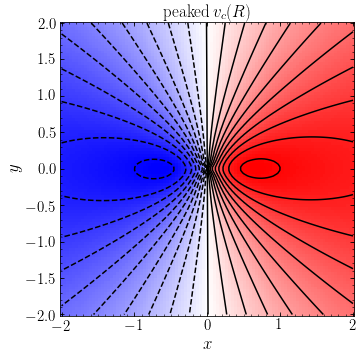

In [89]:
f=0.0045
from galpy import potential
plt.figure(figsize=(14,5))
plot_twod_vfield(potential.MWPotential2014,contours=True,cmap='bwr',
                 levels=numpy.linspace(-.5,.5,21),gcf=True)
bovy_plot.bovy_text(r'$\mathrm{peaked}\, v_c(R)$',title=True,size=17.)
plt.tight_layout()

# Problem 2 
# a)

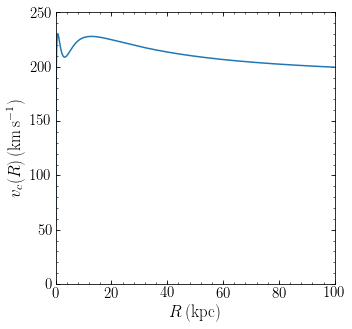

In [90]:
G_conv=G.to('kpc^3/Msun*s^2')
from galpy.potential import MiyamotoNagaiPotential, HernquistPotential, LogarithmicHaloPotential
mp= MiyamotoNagaiPotential(amp=G_conv*10**11*units.Msun, a=6.5*units.kpc, b=0.26*units.kpc)
lp= LogarithmicHaloPotential(amp= 2*(131.5*units.km/units.s)**2, q=0.8, core=12*units.kpc)
hp= HernquistPotential(amp=2*G_conv*3.4*10**10*units.Msun, a=0.7*units.kpc)
POT_LIST=[mp,lp,hp]
from galpy.potential import plotRotcurve
plotRotcurve(POT_LIST,Rrange=[0.01,100.], grid=1001, yrange=[0,250.])

Zooming into the the first 40 Kpc of the rotation curve gives us.

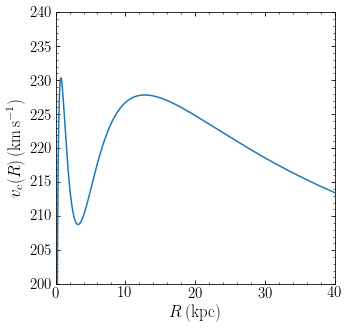

In [91]:
plotRotcurve(POT_LIST,Rrange=[0.01,40.], grid=1001, yrange=[200,240.])

In [92]:
galpy.potential.turn_physical_off(POT_LIST)

# b)

## i)

\begin{align}
E_c=K+U
\end{align}
where K and U are the kinetic and potential energies of the circular orbit respectively.
We can get $K=\frac{v_{c}^2}{2}$ from the rotation curve above U from using galpy's evaluate.Potentials functionality.

$v_{c}$ can be found from reading off a value from the rotation curve (equivalent to evaluating 'potential.vcirc' for the potential list done below). Alternatively, $v_{c}$ can be computed as the circular velocities of each constituent potential added in quadrature (i.e. $v_{c}^2=v_{Hern}^2+v_{MG}^2+v_{log}^2$). 

In [93]:
def Ec(R):
    #v_c=numpy.sqrt(hp.vcirc(R*units.kpc)**2+mp.vcirc(R*units.kpc)**2+lp.vcirc(R*units.kpc)**2)
    v_c=potential.vcirc(POT_LIST,R*units.kpc)
    return v_c**2/2+galpy.potential.evaluatePotentials(POT_LIST,R*units.kpc,z=0)
print (Ec(30))

1.10370259094


In [94]:
print ("In natural units we calculate the energy for a circular orbit at R=30 Kpc to be: %.3f" %Ec(30))

In natural units we calculate the energy for a circular orbit at R=30 Kpc to be: 1.104


## ii)

The angular momentum of a circular orbit can be simply expressed as,

\begin{align}
L_z=r\cdot v_c
\end{align}

In [95]:
def Lz(R):
    #v_c=numpy.sqrt(hp.vcirc(R*units.kpc)**2+mp.vcirc(R*units.kpc)**2+lp.vcirc(R*units.kpc)**2)
    v_c=potential.vcirc(POT_LIST,R*units.kpc)
    return R/8.*v_c

print (Lz(30))

print ("In natural units we calculate the angular momentum for a circular orbit at R=30 Kpc to be: %.3f" %Lz(30))
    

3.72585558749
In natural units we calculate the angular momentum for a circular orbit at R=30 Kpc to be: 3.726


In [96]:
from galpy import potential
from galpy.orbit import Orbit
def orbit_RvRELz(R,vR,E,Lz,pot=None):
    """Returns Orbit at (R,vR,phi=0,z=0) with given (E,Lz)"""
    return Orbit([R,vR,Lz/R,0.,0.,0.])
R, E, Lz=30./8.,1.10370259094,3.72585558749
vR= 0.
o= orbit_RvRELz(R,vR,E,Lz,pot=POT_LIST)
ts= numpy.linspace(0.,10000.,1000001)
o.integrate(ts,POT_LIST)

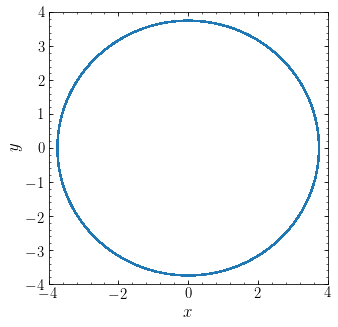

In [97]:
o.plot(d1='x',d2='y', xrange=[-4,4], yrange=[-4,4])

/Users/ryanmckinven/anaconda/envs/galdyncourse/lib/python3.5/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))



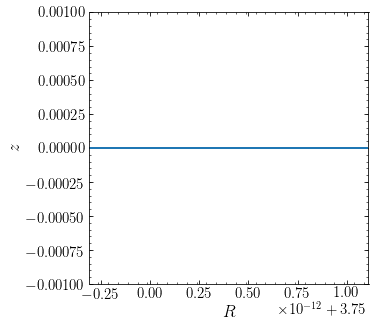

In [98]:
o.plot(d1='R',d2='z')

Thus, as expected plotting in (x,y) displays a circular orbit while plotting in (R,z) shows very small variations in R (order $10^{-12}$) due to numerical errors introduced from integrating the orbit.  

# c)

0.0 3.75 0.0 0.0 0.982320331985


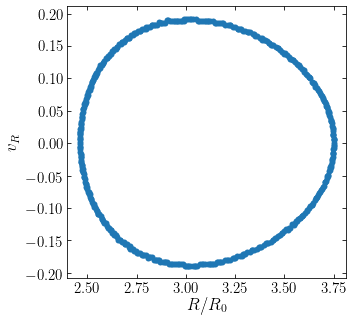

In [99]:
def orbit_RvRELz(R,vR,E,Lz,pot=None):
    """Returns Orbit at (R,vR,phi=0,z=0) with given (E,Lz)"""
    return Orbit([R,vR,Lz/R,0.,numpy.sqrt(2.*(E-potential.evaluatePotentials(pot,R,0.)
                                 -(Lz/R)**2./2.-vR**2./2)),0.])

def surface_section(Rs,zs,vRs):
    # Find points where the orbit crosses z from - to +
    shiftzs= numpy.roll(zs,-1)
    indx= (zs[:-1] < 0.)*(shiftzs[:-1] > 0.)
    return (Rs[:-1][indx],vRs[:-1][indx])

R, E, Lz= 30/8., 1.10370259094, 0.15*3.72585558749
vR= 0.
o=orbit_RvRELz(R,vR,E,Lz,pot=POT_LIST)
ts= numpy.linspace(0.,10000.,1000001)
o.integrate(ts,POT_LIST)
sect1Rs,sect1vRs=surface_section(o.R(ts),o.z(ts),o.vR(ts))
print(ts[0],o.R(ts[0]),o.vR(ts[0]),o.z(ts[0]),o.vz(ts[0]))
plt.plot(sect1Rs,sect1vRs,'o',mec='none')
plt.xlabel(r'$R/R_0$')
plt.ylabel(r'$v_R$');

The plot above shows that the locus of the orbit in the surface of section is one-dimensional. As explained in the notes this means that the locus of the orbit in the three-dimensional (R,z,$v_R$) space is two-dimensional. Unsurprisingly, the general shape of the orbit in (R,$v_R$) space closely follows that of the milky-way potential ('MWPotential2014') investigated in the notes. This is because the potential we have created here is includes all the components (i.e. bulge,disk,halo) considered in the 'MWPotential2014' default potential.

In [100]:
#R, E, Lz= 30/8., 1.10370259094, 0.15*3.72585558749
#vR= 0.
#o=orbit_RvRELz(R,vR,E,Lz,pot=POT_LIST)
#ts= numpy.linspace(0.,10000.,10000001)
#o.integrate(ts,POT_LIST)
#sect1Rs,sect1vRs=surface_section(o.R(ts),o.z(ts),o.vR(ts))
#plt.plot(sect1Rs,sect1vRs,'o',mec='none')
#plt.xlabel(r'$R/R_0$')
#plt.ylabel(r'$v_R$');

$L_z$ uniquely determines the tangential velocity $v_{circ}$ but there still remains a degeneracy between $v_R$ and $v_z$. The plot above shows the surface of section for an orbit where the initial velocity in the radial direction $v_R$=0. 

Now, let's try to see how varying $v_R$ and $v_z$ changes the properties of the surface of section for the orbit. 

0.482476617316 0.0
0.482476617316 0.310636964097
0.482476617316 0.4393070076
0.482476617316 0.538039004524
0.482476617316 0.621273928193
0.482476617316 0.694605368044
0.482476617316 0.760902057284
0.482476617316 0.821868155024
0.482476617316 0.8786140152
0.482476617316 0.93191089229


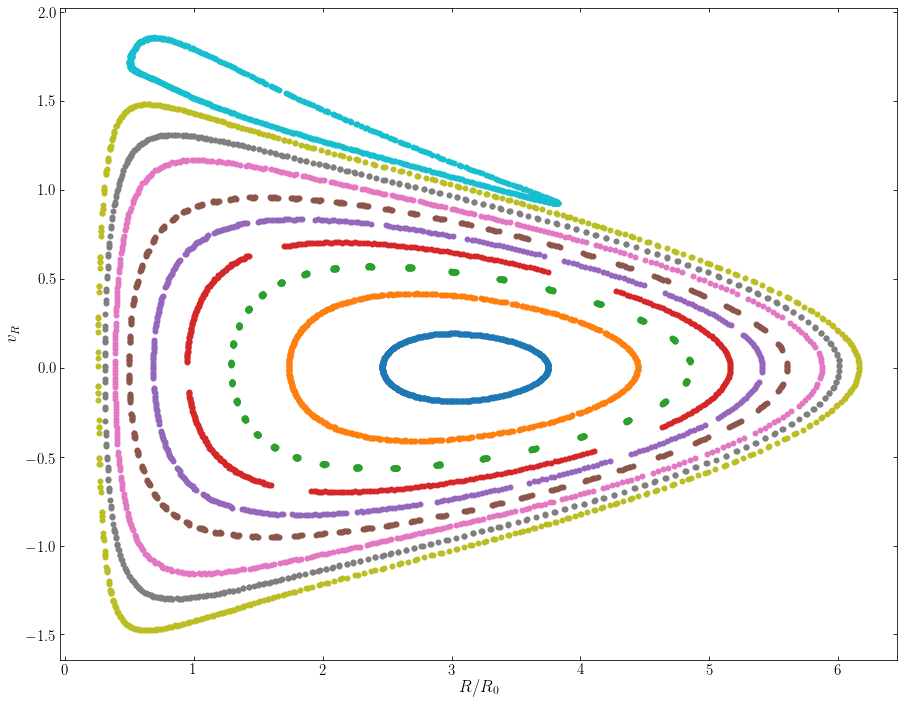

In [101]:
def orbit_RvRELz(R,vR,E,Lz,pot=None):
    """Returns Orbit at (R,vR,phi=0,z=0) with given (E,Lz)"""
    return Orbit([R,vR,Lz/R,0.,numpy.sqrt(2.*(E-potential.evaluatePotentials(pot,R,0.)
                                 -(Lz/R)**2./2.-vR**2./2)),0.])

def surface_section(Rs,zs,vRs):
    # Find points where the orbit crosses z from - to +
    shiftzs= numpy.roll(zs,-1)
    indx= (zs[:-1] < 0.)*(shiftzs[:-1] > 0.)
    return (Rs[:-1][indx],vRs[:-1][indx])

R, E, Lz= 30/8., 1.10370259094, 0.15*3.72585558749
E_res=E-potential.evaluatePotentials(POT_LIST,R,0.)-((Lz/R)**2./2.)
plt.figure(figsize=(15,12))
for i in range(10):
    vR= numpy.sqrt(i*0.1*2*E_res)
    print (E_res,vR)
    o=orbit_RvRELz(R,vR,E,Lz,pot=POT_LIST)
    ts= numpy.linspace(0.,10000.,1000001)
    o.integrate(ts,POT_LIST)
    sect1Rs,sect1vRs=surface_section(o.R(ts),o.z(ts),o.vR(ts))
    plt.plot(sect1Rs,sect1vRs,'o',mec='none')
    plt.xlabel(r'$R/R_0$')
    plt.ylabel(r'$v_R$');

0.482476617316 0.93191089229


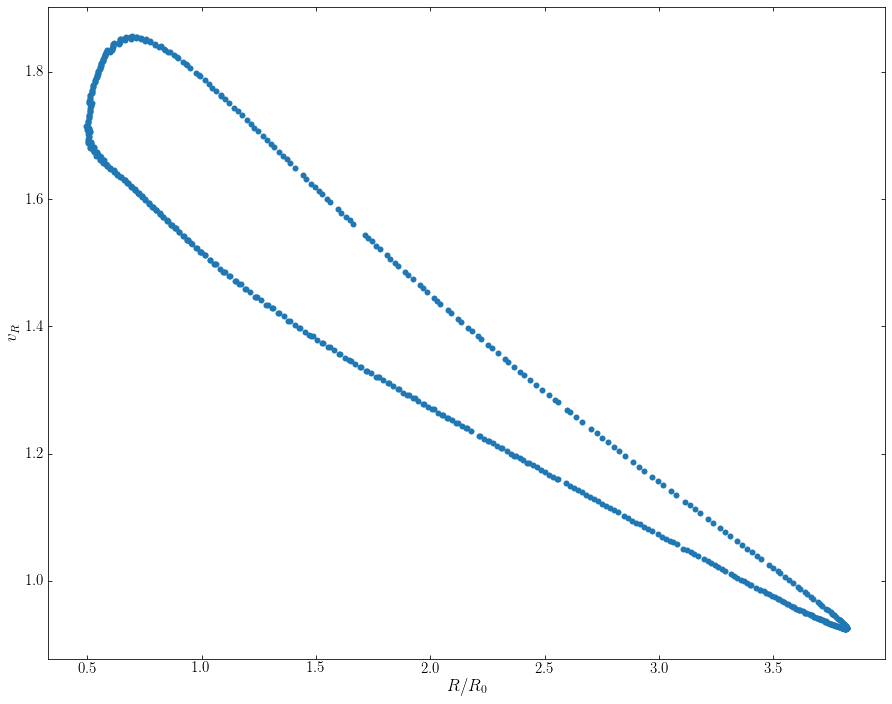

In [102]:
def orbit_RvRELz(R,vR,E,Lz,pot=None):
    """Returns Orbit at (R,vR,phi=0,z=0) with given (E,Lz)"""
    return Orbit([R,vR,Lz/R,0.,numpy.sqrt(2.*(E-potential.evaluatePotentials(pot,R,0.)
                                 -(Lz/R)**2./2.-vR**2./2)),0.])

def surface_section(Rs,zs,vRs):
    # Find points where the orbit crosses z from - to +
    shiftzs= numpy.roll(zs,-1)
    indx= (zs[:-1] < 0.)*(shiftzs[:-1] > 0.)
    return (Rs[:-1][indx],vRs[:-1][indx])

R, E, Lz= 30/8., 1.10370259094, 0.15*3.72585558749
E_res=E-potential.evaluatePotentials(POT_LIST,R,0.)-((Lz/R)**2./2.)
plt.figure(figsize=(15,12))

vR= numpy.sqrt(0.9*2*E_res)
print (E_res,vR)
o=orbit_RvRELz(R,vR,E,Lz,pot=POT_LIST)
ts= numpy.linspace(0.,10000.,1000001)
o.integrate(ts,POT_LIST)
sect1Rs,sect1vRs=surface_section(o.R(ts),o.z(ts),o.vR(ts))
plt.plot(sect1Rs,sect1vRs,'o',mec='none')
plt.xlabel(r'$R/R_0$')
plt.ylabel(r'$v_R$');

The plot above shows the surfaces of section for 10 different orbit starting with different initial conditions on $v_z$ and $v_R$. Like in the notes, increasing the $v_R$ contribution increased 'size' of the closed loop of the corresponding cross-section. Also, orbits with larger initial $v_R$ values are less symmetric (more 'guitar pick-y') which shows the influence of these orbits as they probe the galactic bulge potential at low R.

The 'Cyan' loop corresponds to the orbit with the largest $v_R$ value of 90% of the residual E after removing potential and trangential energies. (replotted directly above). This cannot correspond to a real orbit since $v_R$>0 at all points and so should be unbounded and yet the surface of section is a closed loop which is a contradiction. 

# d)


1.63206842834 0.0
1.63206842834 0.571326251513
1.63206842834 0.807977333429
1.63206842834 0.989566095318
1.63206842834 1.14265250303
1.63206842834 1.27752433571
1.63206842834 1.39945779286
1.63206842834 1.51158717899
1.63206842834 1.61595466686
1.63206842834 1.71397875454


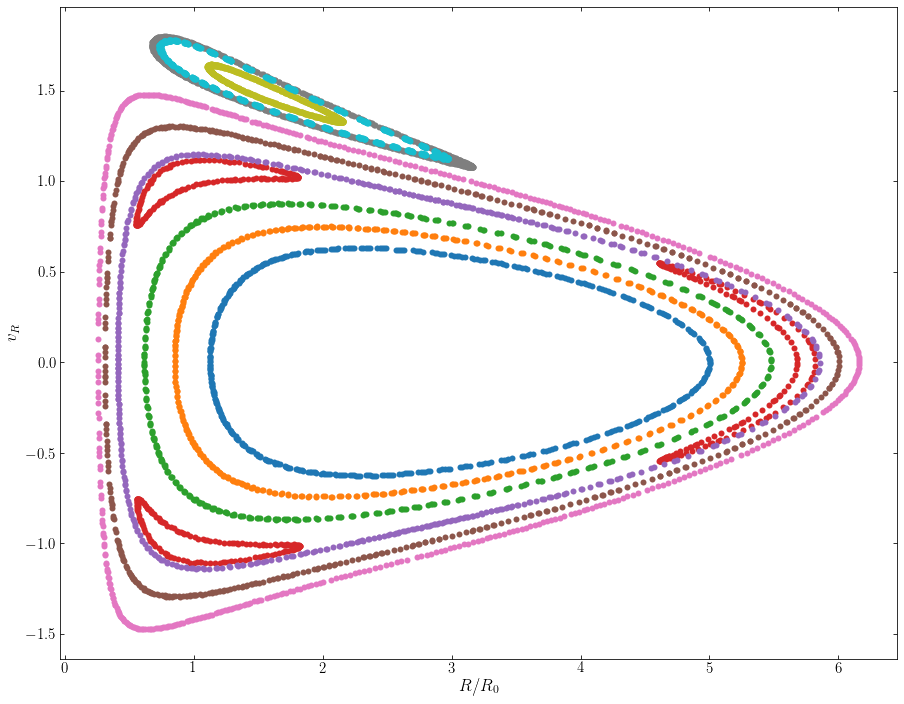

In [103]:
R, E, Lz= 9/8., 1.10370259094, 0.15*3.72585558749
E_res=E-potential.evaluatePotentials(POT_LIST,R,0.)-((Lz/R)**2./2.)
plt.figure(figsize=(15,12))
for i in range(10):
    vR=numpy.sqrt(i*0.1*2*E_res)
    print (E_res,vR)
    o=orbit_RvRELz(R,vR,E,Lz,pot=POT_LIST)
    ts= numpy.linspace(0.,10000.,1000001)
    o.integrate(ts,POT_LIST)
    sect1Rs,sect1vRs=surface_section(o.R(ts),o.z(ts),o.vR(ts))
    plt.plot(sect1Rs,sect1vRs,'o',mec='none')
    plt.xlabel(r'$R/R_0$')
    plt.ylabel(r'$v_R$');     

As was the case for the 'MWPotential2014' orbit from the notes, the orbit plotted above shows the affect of the bulge region where the potential is quite different from that in the disk and halo region. This effect was also seen the orbits at 30Kpc but only for those with large initial $v_R$ values suffient to probe the inner region of the disk.

Another interesting feature are the islands that appear as red loops in the surface of sections, these correspond to the same orbital conditions so the orbit jumps to these locations over the integrated time. Unlike the similar the islands and closed loops discussed in the notes for the HenonHeilesPotential these surfaces of section should all have the same parent orbit (i.e. the circular orbit). 

We also see that there are more unphysical island regions (compared to part (c)) probably corresponding to unbounded orbits. Pushing the initial R of the orbit closer would seem to make the integrated orbit more sensitive to initial conditions in $v_R$ and $v_z$ values.

# e)

0.482476617316 0.0
0.482476617316 0.310636964097
0.482476617316 0.4393070076
0.482476617316 0.538039004524
0.482476617316 0.621273928193
0.482476617316 0.694605368044
0.482476617316 0.760902057284
0.482476617316 0.821868155024
0.482476617316 0.8786140152
0.482476617316 0.93191089229


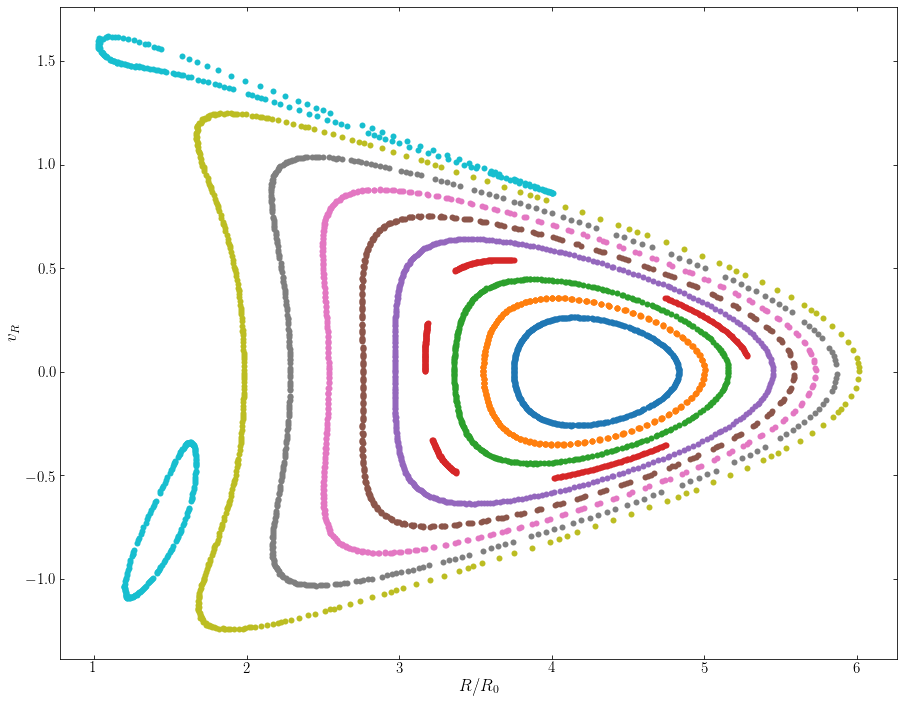

In [104]:
lp= LogarithmicHaloPotential(amp= 2*(131.5*units.km/units.s)**2, q=1.25, core=12*units.kpc)
POT_LIST=[mp,lp,hp]
R, E, Lz= 30/8., 1.10370259094, 0.15*3.72585558749
E_res=E-potential.evaluatePotentials(POT_LIST,R,0.)-((Lz/R)**2./2.)
plt.figure(figsize=(15,12))
for i in range(10):
    vR= numpy.sqrt(i*0.1*2*E_res)
    print (E_res,vR)
    o=orbit_RvRELz(R,vR,E,Lz,pot=POT_LIST)
    ts= numpy.linspace(0.,10000.,1000001)
    o.integrate(ts,POT_LIST)
    sect1Rs,sect1vRs=surface_section(o.R(ts),o.z(ts),o.vR(ts))
    plt.plot(sect1Rs,sect1vRs,'o',mec='none')
    plt.xlabel(r'$R/R_0$')
    plt.ylabel(r'$v_R$');

Since $\Phi_{log}\propto \ln(z^2/q^2)$, flattening the potential should act to make $\Phi_{log}$ less sensitive to changes in z. The plot above that the general shape of the majority of the surfaces of section are similar to those in part (c) with the exception of concavity of the loops that explore inner regions of the galaxy. Not sure of the physical interpetation of this. 'Cyan' islands regions are also seen, which unlike part (c) should now by actual physical orbits since there are islands corresponding to both positive and negative $v_R$ values so the orbit won't be unbounded.  

Finally, the red loop shows that there are regions along the curve that are forbidden. I'm not sure if these could be resolved by increasing the integartion time or decreasing the integration step size.  